In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df = pd.read_excel("Order.all.20240702_20240801.xlsx")
df.head()

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ช่องทางการชำระเงิน (รายละเอียด),แผนการผ่อนชำระ,...,หมายเลขโทรศัพท์,หมายเหตุจากผู้ซื้อ,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,240702G2T2C5UP,สำเร็จแล้ว,NaN,NaN,pointcableofpoint,2024-07-02 00:06,2024-07-02 00:06,บัตรเครดิต/บัตรเดบิต,NaN,Airpay Credit Card,...,******79,NaN,******ลบุรี-แกลง ต.หนองไผ่แก้ว ตำบลหนองไผ่แก้ว...,TH,จังหวัดชลบุรี,อำเภอบ้านบึง,20220,NaN,2024-07-08 05:01,NaN
1,240702G33NEMYE,สำเร็จแล้ว,NaN,NaN,nittayaying443,2024-07-02 00:11,2024-07-02 00:41,เก็บเงินปลายทาง,NaN,Cash on Delivery,...,******62,NaN,****** อ่อนนุช แขวง ประเวศ เขต ประเวศ กรุงเทพม...,TH,จังหวัดกรุงเทพมหานคร,เขตประเวศ,10250,NaN,2024-07-06 20:52,NaN
2,240702G33NEMYE,สำเร็จแล้ว,NaN,NaN,nittayaying443,2024-07-02 00:11,2024-07-02 00:41,เก็บเงินปลายทาง,NaN,Cash on Delivery,...,******62,NaN,****** อ่อนนุช แขวง ประเวศ เขต ประเวศ กรุงเทพม...,TH,จังหวัดกรุงเทพมหานคร,เขตประเวศ,10250,NaN,2024-07-06 20:52,NaN
3,240702G3FWDVRN,สำเร็จแล้ว,NaN,NaN,unchaporn,2024-07-02 00:18,2024-07-02 00:19,SPayLater,Shopee Credit Down Payment,Shopee Credit Down Payment x5,...,******37,NaN,******งหนองบอน เขตประเวศ กรุงเทพ 10250 แขวงหนอ...,TH,จังหวัดกรุงเทพมหานคร,เขตประเวศ,10250,NaN,2024-07-03 18:39,NaN
4,240702G42VXCWU,สำเร็จแล้ว,NaN,NaN,paryut6767,2024-07-02 00:29,2024-07-02 00:29,QR พร้อมเพย์,NaN,PromptPay QR,...,******20,NaN,"****** ถนน พหลโยธิน, แขวง สนามบิน, เขตดอนเมือง...",TH,จังหวัดกรุงเทพมหานคร,เขตดอนเมือง,10210,NaN,2024-07-07 01:58,NaN


In [4]:
df.columns

Index(['หมายเลขคำสั่งซื้อ', 'สถานะการสั่งซื้อ', 'เหตุผลในการยกเลิกคำสั่งซื้อ',
       'สถานะการคืนเงินหรือคืนสินค้า', 'ชื่อผู้ใช้ (ผู้ซื้อ)',
       'วันที่ทำการสั่งซื้อ', 'เวลาการชำระสินค้า', 'ช่องทางการชำระเงิน',
       'ช่องทางการชำระเงิน (รายละเอียด)', 'แผนการผ่อนชำระ', 'ค่าธรรมเนียม (%)',
       'ตัวเลือกการจัดส่ง', 'วิธีการจัดส่ง', '*หมายเลขติดตามพัสดุ',
       'วันที่คาดว่าจะทำการจัดส่งสินค้า', 'เวลาส่งสินค้า',
       'เลขอ้างอิง Parent SKU', 'ชื่อสินค้า',
       'เลขอ้างอิง SKU (SKU Reference No.)', 'ชื่อตัวเลือก', 'ราคาตั้งต้น',
       'ราคาขาย', 'จำนวน', 'Returned quantity', 'ราคาขายสุทธิ',
       'ส่วนลดจาก Shopee', 'โค้ดส่วนลดชำระโดยผู้ขาย', 'โค้ด Coins Cashback',
       'โค้ดส่วนลดชำระโดย Shopee', 'โค้ดส่วนลด',
       'เข้าร่วมแคมเปญ bundle deal หรือไม่',
       'ส่วนลด bundle deal ชำระโดยผู้ขาย', 'ส่วนลด bundle deal ชำระโดย Shopee',
       'ส่วนลดจากการใช้เหรียญ', 'ส่วนลดทั้งหมดจากบัตรเครดิต', 'ค่าคอมมิชชั่น',
       'Transaction Fee', 'ต้นทุนขายหักคูปองและcoin',
       '

In [5]:
customer_groups = [
    {
        "group_name": "Price-Sensitive Customers",
        "relevant_features": [
            "ราคาขาย", #(Sale Price)
            "ส่วนลดจาก Shopee", #(Shopee Discount)
            "โค้ดส่วนลดชำระโดยผู้ขาย", #(Discount Code by Seller)
            "โค้ด Coins Cashback"
        ],
        "description": "Customers who are likely to respond to discounts, cashback offers, and other price-related promotions."
    },
    {
        "group_name": "Product-Focused Customers",
        "relevant_features": [
            "ชื่อสินค้า", #(Product Name)
            "เลขอ้างอิง SKU (SKU Reference No.)",
            "เข้าร่วมแคมเปญ bundle deal หรือไม่", #(Participation in Bundle Deal)
            "แผนการผ่อนชำระ" #(Installment Plan)
        ],
        "description": "Customers who are influenced by specific product promotions, bundles, or installment payment options."
    },
    {
        "group_name": "Loyalty-Driven Customers",
        "relevant_features": [
            "ชื่อผู้ใช้ (ผู้ซื้อ)", #(Username)
            "วันที่ทำการสั่งซื้อ", #(Order Date)
            "เวลาที่ทำการสั่งซื้อสำเร็จ", #(Order Completion Time)
            "ส่วนลด bundle deal ชำระโดย Shopee" #(Shopee-Paid Bundle Deal Discount)
        ],
        "description": "Customers who respond to loyalty rewards and have a history of repeat purchases."
    },
    {
        "group_name": "Convenience-Oriented Customers",
        "relevant_features": [
            "ช่องทางการชำระเงิน", #(Payment Method)
            "วิธีการจัดส่ง", #(Shipping Method)
            "ค่าจัดส่งที่ชำระโดยผู้ซื้อ", #(Shipping Fee Paid by Buyer)
            "เวลาส่งสินค้า" #(Delivery Time)
        ],
        "description": "Customers who prioritize convenience and are influenced by promotions that offer free or expedited shipping, easy payment options, etc."
    },
    {
        "group_name": "High-Value Customers",
        "relevant_features": [
            "จำนวนเงินทั้งหมด", #(Total Amount)
            "ค่าธรรมเนียม (%)", #(Fee Percentage)
            "ค่าคอมมิชชั่น" #(Commission Fee)
        ],
        "description": "Customers who typically make higher-value purchases and respond to exclusive promotions or benefits."
    },
    {
        "group_name": "Location-Based Customers",
        "relevant_features": [
            "ที่อยู่ในการจัดส่ง", #(Shipping Address)
            "ประเทศ", #(Country)
            "จังหวัด", #(Province)
            "เขต/อำเภอ", #(District)
            "รหัสไปรษณีย์" #(Postal Code)
        ],
        "description": "Customers who respond well to region-specific promotions or offers relevant to their specific area."
    }
]


In [6]:
categories = []
for group in customer_groups:
    categories.append(df[group["relevant_features"]])

In [14]:
categories[0].head()

,ราคาขาย,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback
0,49.0,0.0,0.0,0.0
1,30.0,0.0,0.0,0.0
2,35.0,0.0,0.0,0.0
3,29.5,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0


In [8]:
# with pd.ExcelWriter('Category.xlsx') as writer:
#     for i in range(len(categories)):
#         categories[i].to_excel(writer , index = False , sheet_name =  customer_groups[i]["group_name"])

In [9]:
model = KMeans(n_clusters= 10)

In [11]:
model.fit(categories[0])

KMeans(n_clusters=10)

In [13]:
y_pred = model.predict(categories[0])

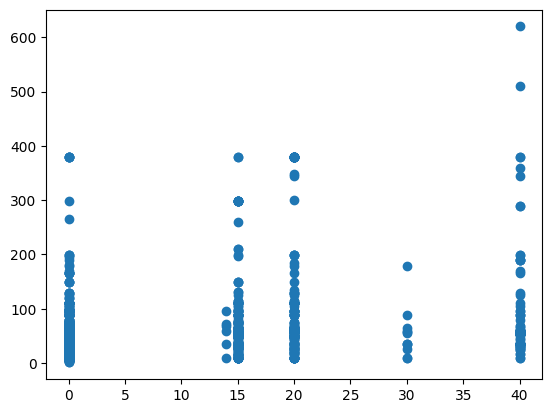

In [21]:
plt.scatter(df[["โค้ดส่วนลดชำระโดยผู้ขาย"]] , df[["ราคาขาย"]])